In [48]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import pickle

In [49]:
train = pd.read_csv("Cas13designGuidePredictorInput.csv")
# 35 features
train = train[['normCS', 'MFE','DR','Gquad','Log10_Unpaired','hybMFE_3.12','hybMFE_15.9' ,
             'NTdens_max_A','NTdens_max_C','NTdens_max_G','NTdens_max_T','NTdens_max_AT' , 'NTdens_max_GC',
             'NTdens_min_A' ,  'NTdens_min_C' ,  'NTdens_min_G' ,  'NTdens_min_T' , 'NTdens_min_AT' ,
             'pA','pC','pG',
             'pAA','pAC','pAG','pAT','pCA','pCC','pCG','pCT','pGA','pGC','pGG','pGT','pTA','pTC','pTG']]
train = train[['normCS', 'MFE','DR','Gquad','hybMFE_3.12','hybMFE_15.9' ,
             'NTdens_max_A','NTdens_max_C','NTdens_max_G','NTdens_max_T','NTdens_max_AT' , 'NTdens_max_GC',
             'NTdens_min_A' ,  'NTdens_min_G' ,  'NTdens_min_T' , 'NTdens_min_AT' ,
             'pA','pC','pG',
             'pAA','pAC','pAG','pAT','pCA','pCC','pCG','pCT','pGA','pGC','pGG','pGT','pTA','pTC','pTG']]
train = train.dropna()

# train.to_csv("train.csv", index=False)
# train.head()

In [50]:
train_np = train.to_numpy()
X, y = train_np[:, 1:], train_np[:, 0]

scaler = StandardScaler()
pca = PCA(n_components=25)

# y = scaler.fit_transform(y.reshape(-1, 1))
# y = y.flatten()

X = scaler.fit_transform(X)
# X = pca.fit_transform(X)

# from matplotlib import pyplot as plt
# dat = [sum(pca.explained_variance_ratio_[:i + 1]) for i in range(len(pca.explained_variance_ratio_))]
# plt.plot(dat)

pickle.dump(scaler, open("models/scaler.pkl","wb"))
pickle.dump(pca, open("models/pca.pkl","wb"))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42);

In [51]:
from sklearn import svm
from sklearn import linear_model
from sklearn import neural_network
from sklearn import ensemble
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import xgboost as xgb

In [52]:
models = {
    "Support vector machine": svm.SVR(),
    "Multilayer perceptron": neural_network.MLPRegressor(max_iter=1000),
    "Random forest": ensemble.RandomForestRegressor(),
    "Adaboost": ensemble.AdaBoostRegressor(),
    "Gradient boosted trees": ensemble.GradientBoostingRegressor(),
    "XGBoost": xgb.sklearn.XGBModel(),
}

In [53]:
# results = {}
# for model_name, model in models.items():
#     kf = KFold(n_splits=10, shuffle=True, random_state=42)
    
#     metrics = {metric: [] for metric in ["mse", "mae", "rscore"]}
    
#     for train_index, test_index in kf.split(X):
#         X_train, X_test = X[train_index], X[test_index]
#         y_train, y_test = y[train_index], y[test_index]
    
#         model.fit(X_train, y_train)
#         y_pred_test = model.predict(X_test)

#         metrics["mse"].append(mean_squared_error(y_test, y_pred_test))
#         metrics["mae"].append(mean_absolute_error(y_test, y_pred_test))
#         metrics["rscore"].append(r2_score(y_test, y_pred_test))
        
#     mse = np.mean(np.array(metrics["mse"]))
#     mae = np.mean(np.array(metrics["mae"]))
#     rscore = np.mean(np.array(metrics["rscore"]))
    
#     print(f"Name: {model_name}, MSE: {mse}, MAE: {mae}, R-score: {rscore}")
    
#     metrics["mse"] = np.mean(np.array(metrics["mse"]))
#     metrics["mae"] = np.mean(np.array(metrics["mae"]))
#     metrics["rscore"] = np.mean(np.array(metrics["rscore"]))
    
#     results[model_name] = metrics

Name: Support vector machine, MSE: 0.171610054490106, MAE: 0.3118566698820812, R-score: 0.4611476022786401
Name: Multilayer perceptron, MSE: 0.21949345973404366, MAE: 0.3595154671122745, R-score: 0.3074620290750488
Name: Random forest, MSE: 0.17791673847810024, MAE: 0.32116094164177234, R-score: 0.440559603507209
Name: Adaboost, MSE: 0.2342957230020979, MAE: 0.3912744261309896, R-score: 0.2627841011391066
Name: Gradient boosted trees, MSE: 0.18981299162207363, MAE: 0.33427309672645766, R-score: 0.4029248989542876
Name: XGBoost, MSE: 0.18208099562789334, MAE: 0.3228636645124787, R-score: 0.4276092383058108


In [54]:
%matplotlib inline
from matplotlib import pyplot as plt

In [55]:
# with open("resultsdump.tsv", 'w+') as wopen:
#     for model in results.keys():
#         for metric in ["mse", "mae", "rscore"]:
#             for value in results[model][metric]:
#                 wopen.write(f"{model}\t{metric}\t{value}\n")

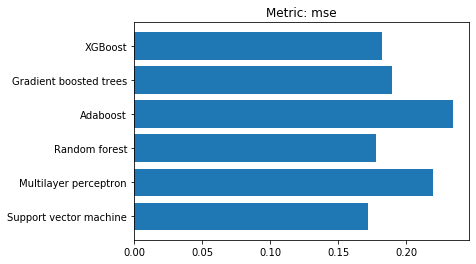

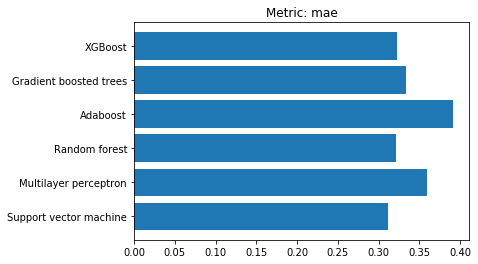

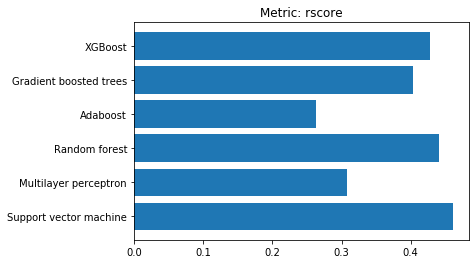

In [56]:
mymodels = list(results.keys())
for metric in ["mse", "mae", "rscore"]:
    values = [results[model][metric] for model in mymodels]
    plt.figure()
    plt.barh(mymodels, values)
#     plt.xticks(rotation='vertical')
    plt.title(f"Metric: {metric}")
#     plt.gca().set_position([.5, -.5, 1, 1])
    plt.savefig(f"models/{metric}.png",bbox_inches='tight')
    plt.show()
    

In [57]:
model = svm.SVR().fit(X, y)
pickle.dump(model, open("models/svm.pkl","wb"))

In [58]:
pickle.dump(results, open("models/results.pkl","wb"))

In [59]:
# for model_name, model in models.items():
#     model.fit(X_train, y_train)
#     y_pred_test = model.predict(X_test)
    
#     mse = mean_squared_error(y_test, y_pred_test)
#     mae = mean_absolute_error(y_test, y_pred_test)
#     rscore = r2_score(y_test, y_pred_test)
    
#     print(f"Name: {model_name}, MSE: {mse}, MAE: {mae}, R-score: {rscore}")

In [60]:
"""
The original training code from Wessels et al.

Hans-Hermann Wessels, Alejandro Méndez-Mancilla, Xinyi Guo, Mateusz Legut, Zharko Daniloski, Neville E. Sanjana. 
Massively parallel Cas13 screens reveal principles for guide RNA design. Nature Biotechnology (2020). doi:10.1038/s41587-020-0456-9
https://www.nature.com/articles/s41587-020-0456-9
"""


# # The effect size value is normCS

# # remove incomplete entries
# x = x[complete.cases(x),FIELDS]

# # scale numeric values for training
# numeric = sapply(x, is.numeric) & colnames(x) != "normCS"  & colnames(x) != "Gquad"  & colnames(x) != "DR" & grepl("[A,C,G,T]_",colnames(x)) == FALSE #DO NOT SCALE response value to [0,1] interval

# tmpmean = apply(x[,numeric], 2, function(x) quantile(x, 0.05))
# tmpsd = apply(x[,numeric], 2, function(x) quantile(x, 0.95)-quantile(x, 0.05)) 
# x[,numeric] = scale(x[,numeric], center=tmpmean, scale=tmpsd) 
# x[,numeric][x[,numeric] > 1] = 1
# x[,numeric][x[,numeric] < 0] = 0

# # sed seed for reproducibility
# set.seed(1234)
# #generate model  
# model = randomForest(x[,-1], x[,1], importance = FALSE, ntree = 2000)

# L = list(model, tmpmean, tmpsd)
# names(L) = c("model", "tmpmean", "tmpsd")
# return(L)



# # Generate Model based on original on-target screens. 
# cat( paste0( "Generate model started on " , date() ,"\n"))
# out = PrePareModelInput(x=fullset, FIELDS=fields)
# Model = out[[1]]
# # Get feature Means and SD for scaling
# ModelInputMeans = out[[2]]
# ModelInputSDs = out[[3]]

'\nThe original training code from Wessels et al.\n\nHans-Hermann Wessels, Alejandro Méndez-Mancilla, Xinyi Guo, Mateusz Legut, Zharko Daniloski, Neville E. Sanjana. \nMassively parallel Cas13 screens reveal principles for guide RNA design. Nature Biotechnology (2020). doi:10.1038/s41587-020-0456-9\nhttps://www.nature.com/articles/s41587-020-0456-9\n'